In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [15]:
data = pd.read_csv('data/Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


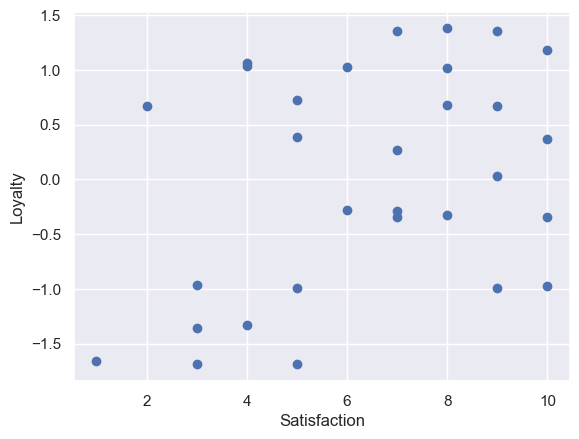

In [16]:
plt.scatter(x=data['Satisfaction'],y=data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [17]:
x = data.copy()

Clustering

In [18]:
Kmeans = KMeans(2)
Kmeans.fit(x)

KMeans(n_clusters=2)

## Cluster Result

In [19]:
clusters = x.copy()
clusters['Cluster_pred'] = Kmeans.fit_predict(x)

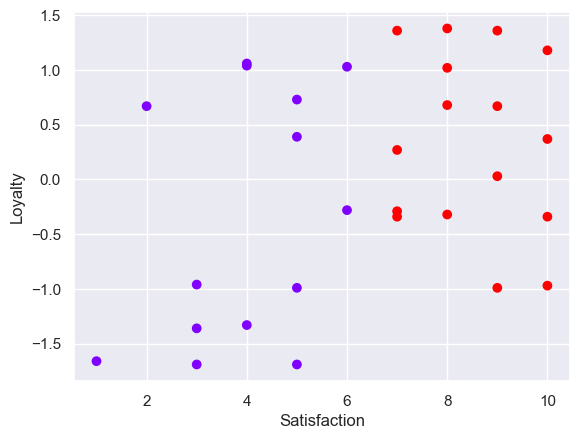

In [20]:
plt.scatter(x=clusters['Satisfaction'],y=clusters['Loyalty'],c=clusters['Cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

Algorithm considered only satisfaction as it's feature since it has higer values

## Standardize the variables

In [21]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Elbow Method

In [22]:
WCSS = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)

WCSS

[59.999999999999986,
 30.35236058808774,
 19.18756411022128,
 10.426343601027583,
 7.792695153937187,
 7.69704104285527,
 5.698929141940151,
 4.380320178840311,
 4.540263350800666]

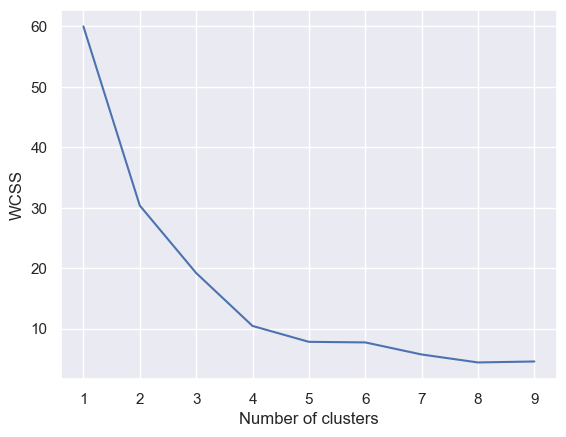

In [23]:
plt.plot(range(1,10),WCSS)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Explore clustering solutions and select the number of clusters

In [24]:
Kmeans_new = KMeans(4)
Kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Cluster_pred'] = Kmeans_new.fit_predict(x_scaled)

In [25]:
clusters_new

,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,2
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


We will plot the data without standardizing AXES, but the solution will be the standardized one

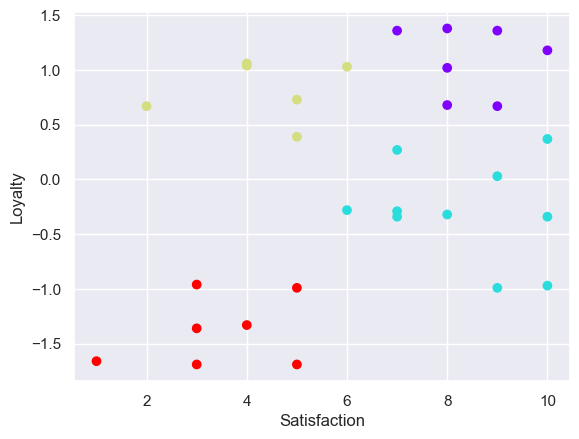

In [27]:
plt.scatter(x=clusters_new['Satisfaction'],y=clusters_new['Loyalty'],c=clusters_new['Cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Dendrogram

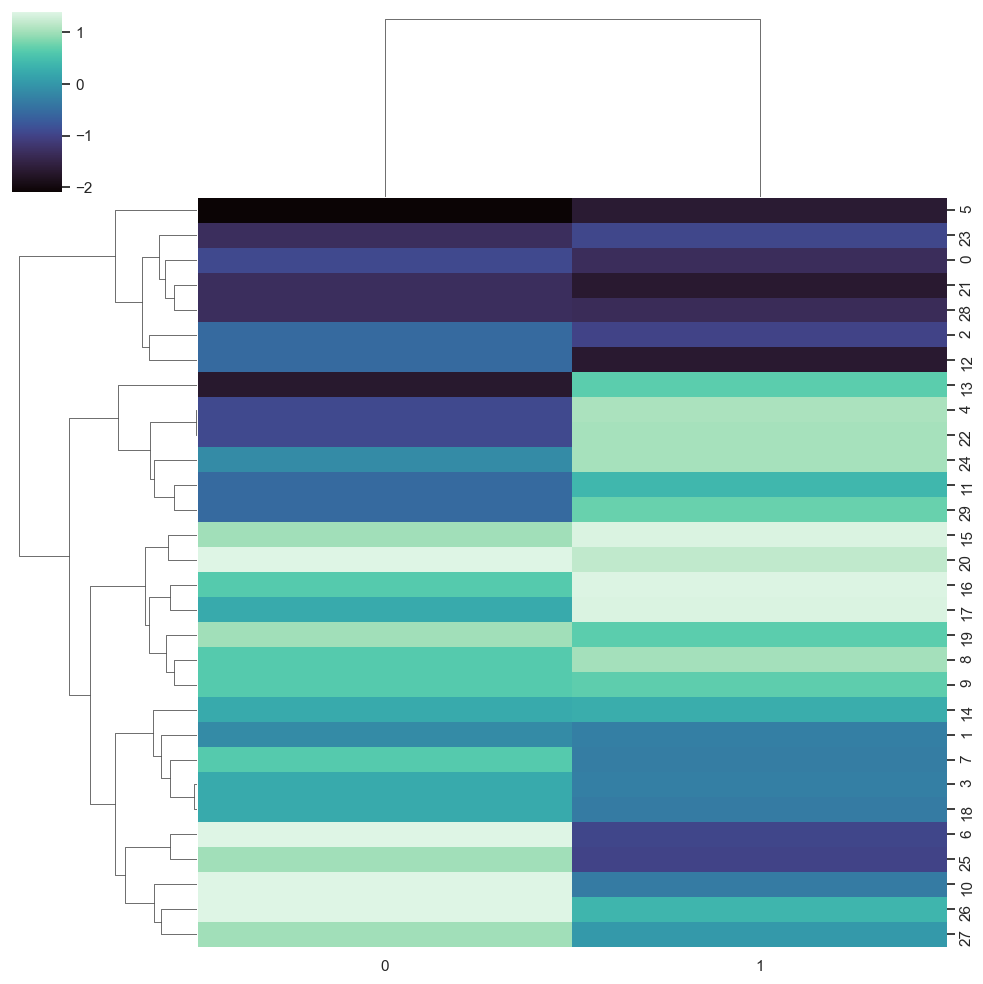

In [30]:
sns.clustermap(x_scaled,cmap='mako')